In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import json
from os.path import expanduser

In [28]:
experiment_name = 'P3830'
feature_detection_method = 'pasef'

In [9]:
MAXIMUM_Q_VALUE = 0.01

#### identifications with correction for saturation

In [29]:
IDENTIFICATIONS_WITH_CS_DIR = '{}/P3856-results-cs-true-fmdw-true-2021-05-01-14-59-47/identifications-pasef'.format(expanduser("~"))
IDENTIFICATIONS_WITH_CS_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_WITH_CS_DIR, experiment_name, feature_detection_method)

In [ ]:
# load the identifications that had saturated points in the mono
with open(IDENTIFICATIONS_WITH_CS_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_with_cs_df = d['identifications_df']
identifications_with_cs_df = identifications_with_cs_df[(identifications_with_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import json
from os.path import expanduser

experiment_name = 'P3856'
feature_detection_method = 'pasef'

IDENTIFICATIONS_WITH_CS_DIR = '{}/results-P3830/P3830-results-cs-true-fmdw-true-2021-05-06-16-55-14/identifications-pasef'.format(expanduser("~"))
IDENTIFICATIONS_WITH_CS_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_WITH_CS_DIR, experiment_name, feature_detection_method)

IDENTIFICATIONS_WITH_CS_FILE

MAXIMUM_Q_VALUE = 0.01

#### identifications with correction for saturation

# load the identifications that had saturated points in the mono
with open(IDENTIFICATIONS_WITH_CS_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_with_cs_df = d['identifications_df']
identifications_with_cs_df = identifications_with_cs_df[(identifications_with_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

FileNotFoundError: [Errno 2] No such file or directory: '/home/daryl/results-P3830/P3830-results-cs-true-fmdw-true-2021-05-06-16-55-14/identifications-pasef/exp-P3856-identifications-pasef-recalibrated.pkl'

#### identifications without correction for saturation

In [10]:
IDENTIFICATIONS_DIR = '{}/results-P3830/P3830-results-cs-false-fmdw-true-2021-05-06-10-17-36/identifications-pasef'.format(expanduser("~"))
IDENTIFICATIONS_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_DIR, experiment_name, feature_detection_method)

In [17]:
# load the identifications that had saturated points in the mono
with open(IDENTIFICATIONS_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_without_cs_df = d['identifications_df']
identifications_without_cs_df = identifications_without_cs_df[(identifications_without_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE) & (~identifications_without_cs_df['protein id'].str.contains('YEAST'))]

In [18]:
identifications_without_cs_df.columns

Index(['mono_mz_lower', 'mono_mz_upper', 'scan_apex', 'scan_lower',
       'scan_upper', 'rt_apex', 'rt_lower', 'rt_upper',
       'mono_intensity_without_saturation_correction',
       'mono_intensity_with_saturation_correction',
       'mono_intensity_adjustment_outcome', 'isotopic_peaks', 'scan_df',
       'rt_df', 'monoisotopic_mz', 'charge', 'monoisotopic_mass',
       'feature_intensity', 'envelope', 'isotope_count', 'deconvolution_score',
       'precursor_cuboid_id', 'fragment_ions_l', 'fmdw_before_after_d',
       'feature_id', 'run_name', 'predicted_mass_error',
       'recalibrated_monoisotopic_mass', 'recalibrated_monoisotopic_mz',
       'file_idx', 'spectrum precursor m/z', 'spectrum neutral mass',
       'peptide mass', 'percolator score', 'percolator q-value',
       'percolator PEP', 'total matches/spectrum', 'sequence', 'protein id',
       'flanking aa', 'observed_monoisotopic_mass', 'theoretical_peptide_mass',
       'mass_accuracy_ppm', 'mass_error'],
      dtype='

In [19]:
identifications_without_cs_df['protein id'].sample(n=10)

3340      P69905ups|HBA_HUMAN_UPS
112      P02768ups|ALBU_HUMAN_UPS
18881    P02768ups|ALBU_HUMAN_UPS
12806    P02768ups|ALBU_HUMAN_UPS
15534    P04040ups|CATA_HUMAN_UPS
15569    P02768ups|ALBU_HUMAN_UPS
3022      P69905ups|HBA_HUMAN_UPS
447      P02768ups|ALBU_HUMAN_UPS
11864     P41159ups|LEP_HUMAN_UPS
893      P02768ups|ALBU_HUMAN_UPS
Name: protein id, dtype: object

In [20]:
len(identifications_without_cs_df['protein id'].unique())

17

/home/daryl/anaconda3/envs/py36/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


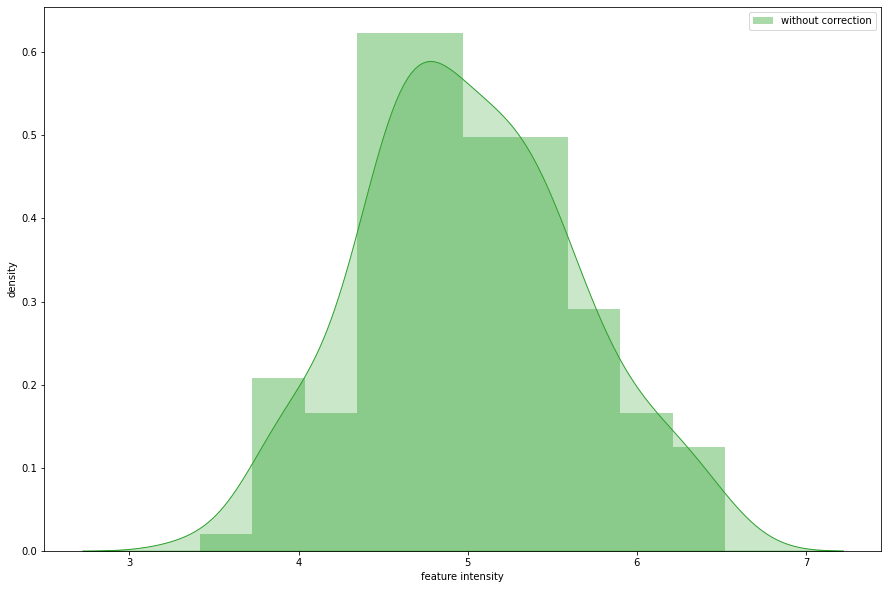

In [25]:
import seaborn as sns
plt.figure(figsize=(15, 10))

title = ''
plt.title(title)

# plt.xlim((-4,4))
# plt.ylim((0,1))

ax = sns.distplot(np.log10(identifications_without_cs_df.feature_intensity), hist = True, color='tab:green', kde = True, kde_kws = {'shade': True, 'linewidth': 1}, label = 'without correction')

_ = ax.set(xlabel='feature intensity', ylabel='density')
_ = ax.legend()